# T1.1: MNIST

## mnist_cnn.py


In [ ]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [ ]:
batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1136 - loss: 2.2940 - val_accuracy: 0.2643 - val_loss: 2.2412
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2129 - loss: 2.2354 - val_accuracy: 0.4572 - val_loss: 2.1691
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3189 - loss: 2.1640 - val_accuracy: 0.5986 - val_loss: 2.0753
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4181 - loss: 2.0735 - val_accuracy: 0.6562 - val_loss: 1.9492
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4867 - loss: 1.9519 - val_accuracy: 0.6930 - val_loss: 1.7862
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5382 - loss: 1.8043 - val_accuracy: 0.7134 - val_loss: 1.5938
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5846 - loss: 1.6261 - val_accuracy: 0.7401 - val_loss: 1.3884
Epoch 8/50
469/469 ━━━━━

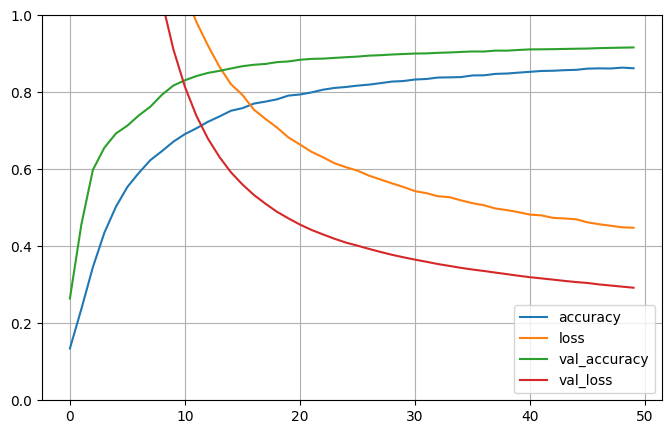

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## mnist_mlp.py


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/vol/home/s4451856/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8595 - loss: 0.4469 - val_accuracy: 0.9649 - val_loss: 0.1122
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9652 - loss: 0.1119 - val_accuracy: 0.9690 - val_loss: 0.1018
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9777 - loss: 0.0717 - val_accuracy: 0.9769 - val_loss: 0.0775
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9814 - loss: 0.0583 - val_accuracy: 0.9796 - val_loss: 0.0694
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9855 - loss: 0.0448 - val_accuracy: 0.9806 - val_loss: 0.0647
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9878 - loss: 0.0390 - val_accuracy: 0.9827 - val_loss: 0.0631
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accuracy: 0.9835 - val_loss: 0.0618
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9912 - loss: 0.0272 - val_accu

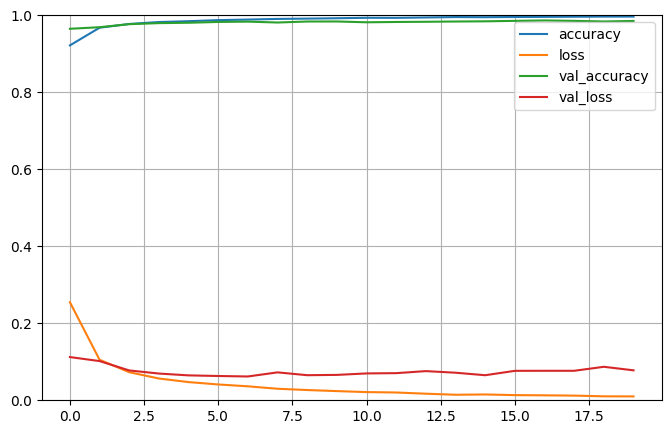

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# T1.2: Fashion MNIST

## (a) Multi-Layer Perceptron

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

fashion_mnist = keras.datasets.fashion_mnist
(xTrainFull, yTrainFull), (xTest, yTest) = fashion_mnist.load_data()

xVal, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yVal, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                 hiddenLayers=1,
                 outputActivation="softmax",
                 optimiser="sgd",
                 epochs=20,
                 alpha=5):

  MLPModel = Sequential()
  MLPModel.add(keras.layers.Flatten(input_shape=[28, 28]))

  for i in range(hiddenLayers):
    MLPModel.add(keras.layers.Dense(300, activation="relu"))
    MLPModel.add(keras.layers.Dense(100, activation="relu"))


  MLPModel.add(keras.layers.Dense(10, activation=outputActivation))

  MLPModel.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimiser,
  metrics=["accuracy"])

  history = MLPModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  test_loss, test_acc = MLPModel.evaluate(xTest,  yTest, verbose=2)
  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Activation: {outputActivation}")
  print(f"Alpha: {alpha}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

## (b) Convolutional Neural Network

In [ ]:
from re import X

def CNNModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest, hiddenLayers=2,
                 outputActivation="softmax",
                 optimiser="sgd",
                 epochs=20):

  CNNModel = Sequential()
  CNNModel.add(Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation='relu'))
  CNNModel.add(MaxPooling2D((2, 2)))
  CNNModel.add(Conv2D(64, (3, 3), activation='relu'))

  CNNModel.add(Flatten())

  for i in range(hiddenLayers):
    CNNModel.add(Dense(64, activation='relu'))

  CNNModel.add(Dense(10), activation=outputActivation)

  CNNModel.compile(optimizer=optimiser,
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])


  history = CNNModel.fit(xTrain, yTrain, epochs=epochs,
                      validation_data=(xVal, yVal))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
  plt.show()

  test_loss, test_acc = CNNModel.evaluate(xTest,  yTest, verbose=2)

  print(f"Hidden layers: {hiddenLayers}")
  print(f"Optimiser: {optimiser}")
  print(f"Activation: {outputActivation}")
  print(f"Epochs: {epochs}")
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")

  return test_acc

## Experimentation and Evaluation

### MLP Model Evaluation

Naive approach, best hyperparameters:

Hidden layers: 1

Optimiser: Adam

Activation: 

Alpha:

Epochs: 30

Test loss: 70.1425552368164

Test accuracy: 0.8331000208854675

In [ ]:
import numpy as np

# MLP model eval
# Epochs
bestEpochs = (30, 0)
#for epochs in [20, 25, 30, 35, 40, 45, 50]:
  #accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest, epochs=epochs)

  #if accuracy > bestEpochs[1]:
    #bestEpochs = (epochs, accuracy)

  #else:
    #break


# Optimiser
bestOptimiser = ("Adam", 0)
#for optimiser in ["SGD",
#                  "RMSprop",
#                  "Adam",
#                  "AdamW",
#                  "Adadelta",
#                  "Adagrad",
#                  "Adamax",
#                  "Adafactor",
#                  "Nadam",
#                  "Ftrl",
#                  "Lion"]:
#  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
#                          epochs=bestEpochs[0],
#                          optimiser=optimiser)

#  if accuracy > bestOptimiser[1]:
#    bestOptimiser = (optimiser, accuracy)


# Output activation function
bestActivation = ("", 0)
for activation in ["relu", "sigmoid", "softmax", "softplus", "softsign",
                   "tanh", "selu", "elu", "exponential"]:
  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          outputActivation=activation,
                          epochs=bestEpochs[0],
                          optimiser=bestOptimiser[0])

  if accuracy > bestActivation[1]:
    bestActivation = (activation, accuracy)


# Hidden Layers
bestHidden = (0, 0)
for layers in range(1, 10):
  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=layers,
                          outputActivation=bestActivation[0],
                          epochs=bestEpochs[0],
                          optimiser=bestOptimiser[0])

  if accuracy > bestHidden[1]:
    bestHidden = (layers, accuracy)

  else:
    break


# Regularisations
bestAlpha = (0, 0)
alphas = np.logspace(-10, -2, 200)
for alpha in alphas:
  accuracy = MLPModelTest(xTrain, yTrain, xVal, yVal, xTest, yTest,
                          hiddenLayers=bestHidden[0],
                          outputActivation=bestActivation[0],
                          epochs=bestEpochs[0],
                          optimiser=bestOptimiser[0],
                          alpha=alpha)

  if accuracy > bestAlpha[1]:
    bestAlpha = (layers, accuracy)

  else:
    break

print(f"Hidden layers: {bestHidden[0]}")
print(f"Optimiser: {bestOptimiser[0]}")
print(f"Activation: {bestActivation[0]}")

print(f"Epochs: {bestEpochs[0]}")
print(f"Test accuracy: {best}")


TypeError: Sequential.__init__() got an unexpected keyword argument 'alpha'